In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
df = pd.read_csv('../data/raw_recording.csv')
df

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4
0,2491.0,1219.0,0,0,0,0
1,2491.0,1219.0,551,86,24,14
2,2489.0,1217.0,120,86,24,19
3,2488.0,1216.0,120,86,24,25
4,2484.0,1214.0,120,85,24,26
...,...,...,...,...,...,...
85060,2235.0,643.0,115,60,18,35
85061,2234.0,643.0,115,60,18,36
85062,2234.0,643.0,115,60,17,36
85063,2233.0,642.0,114,60,17,35


In [4]:
# for i in range(1,1000):

#     df[f'channel_1_{i}'] = df['channel_1'].shift(i)
#     df[f'channel_2_{i}'] = df['channel_2'].shift(i)
#     df[f'channel_3_{i}'] = df['channel_3'].shift(i)
#     df[f'channel_4_{i}'] = df['channel_4'].shift(i)

In [5]:
df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()

In [6]:
df.dropna(inplace=True)

In [7]:
X = np.array(df.drop(columns=['x_pos', 'y_pos', 'x_diff', 'y_diff']))
y = np.array(df[['x_diff', 'y_diff']])
# X = y
X = X.reshape((X.shape[0],X.shape[1],1,))

# X.shape

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [16]:
X_train[0].shape


(4, 1)

In [21]:
X.shape

(85064, 4, 1)

In [22]:
model = Sequential()
model.add(GRU(8, input_shape = (X.shape[1:3]), return_sequences=True))
model.add(GRU(8, return_sequences=False))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(2))



In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['acc'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1) 

Train on 63798 samples, validate on 21266 samples
 8192/63798 [==>...........................] - ETA: 14s - loss: 5.4535 - acc: 0.3484

KeyboardInterrupt: 

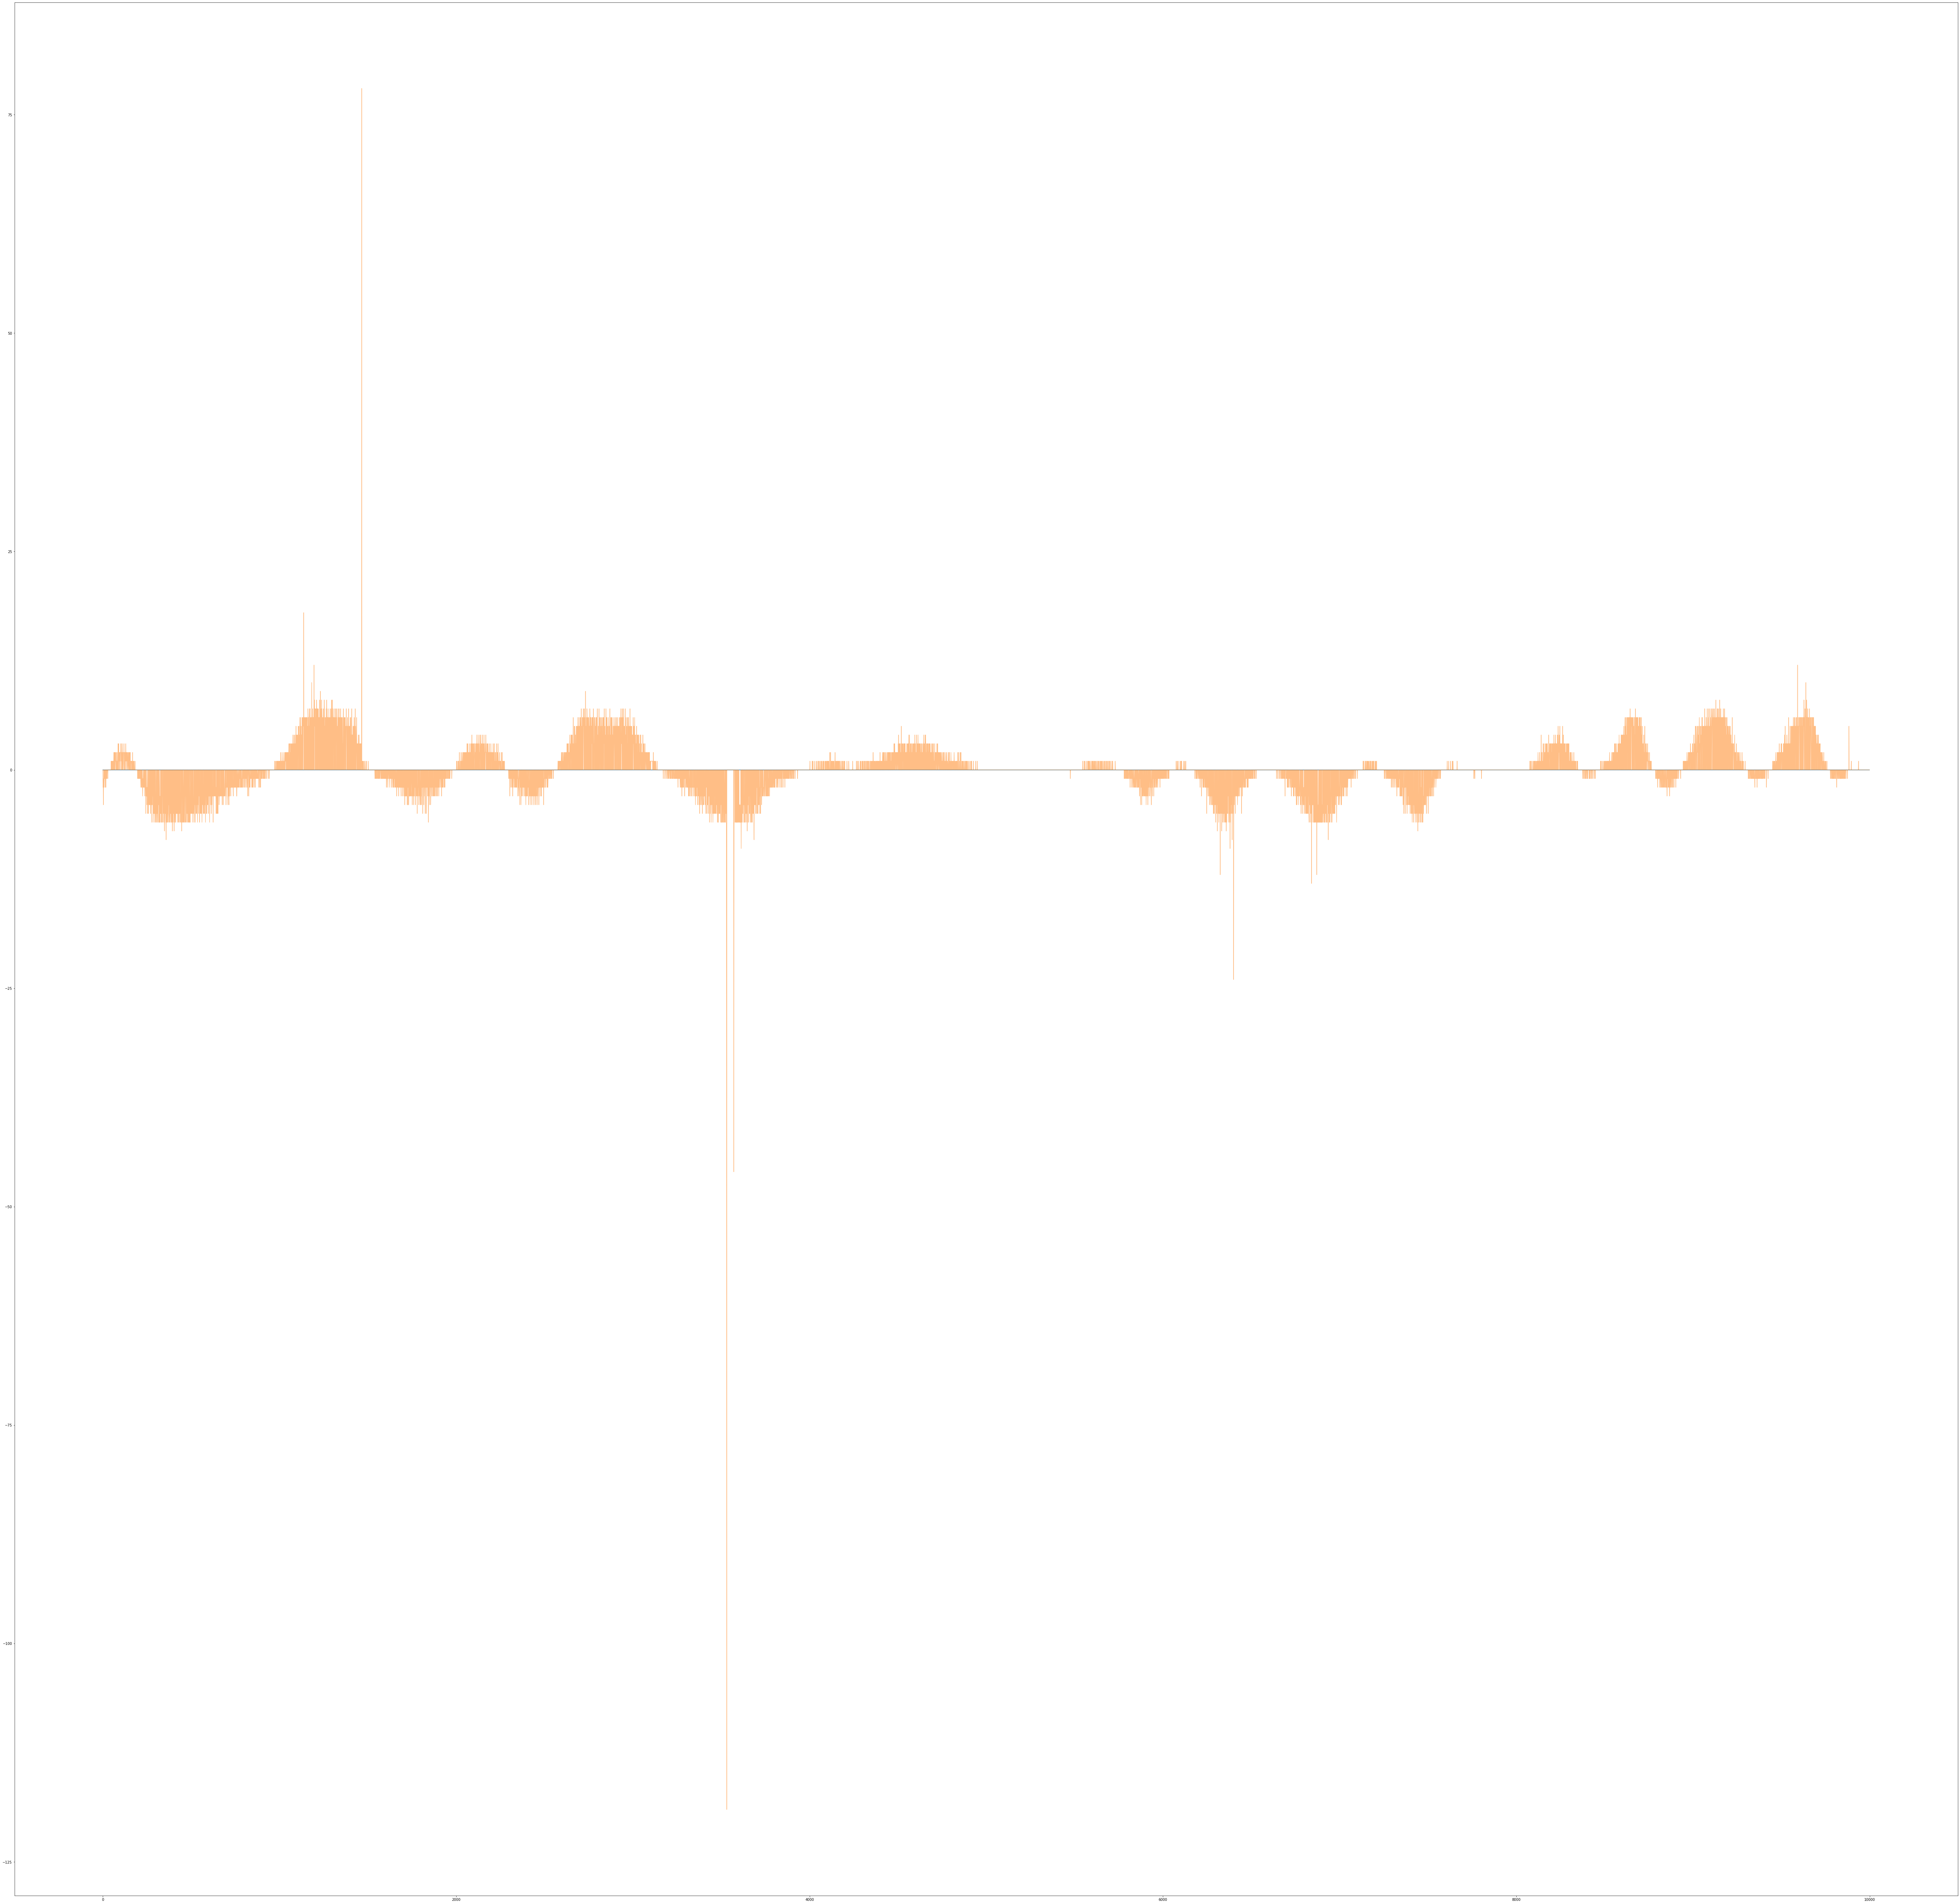

In [14]:
plt.figure(figsize=(100,100))

plt.plot(model.predict(X)[:,0][:10000])
plt.plot(y[:,0][:10000], alpha=.5)

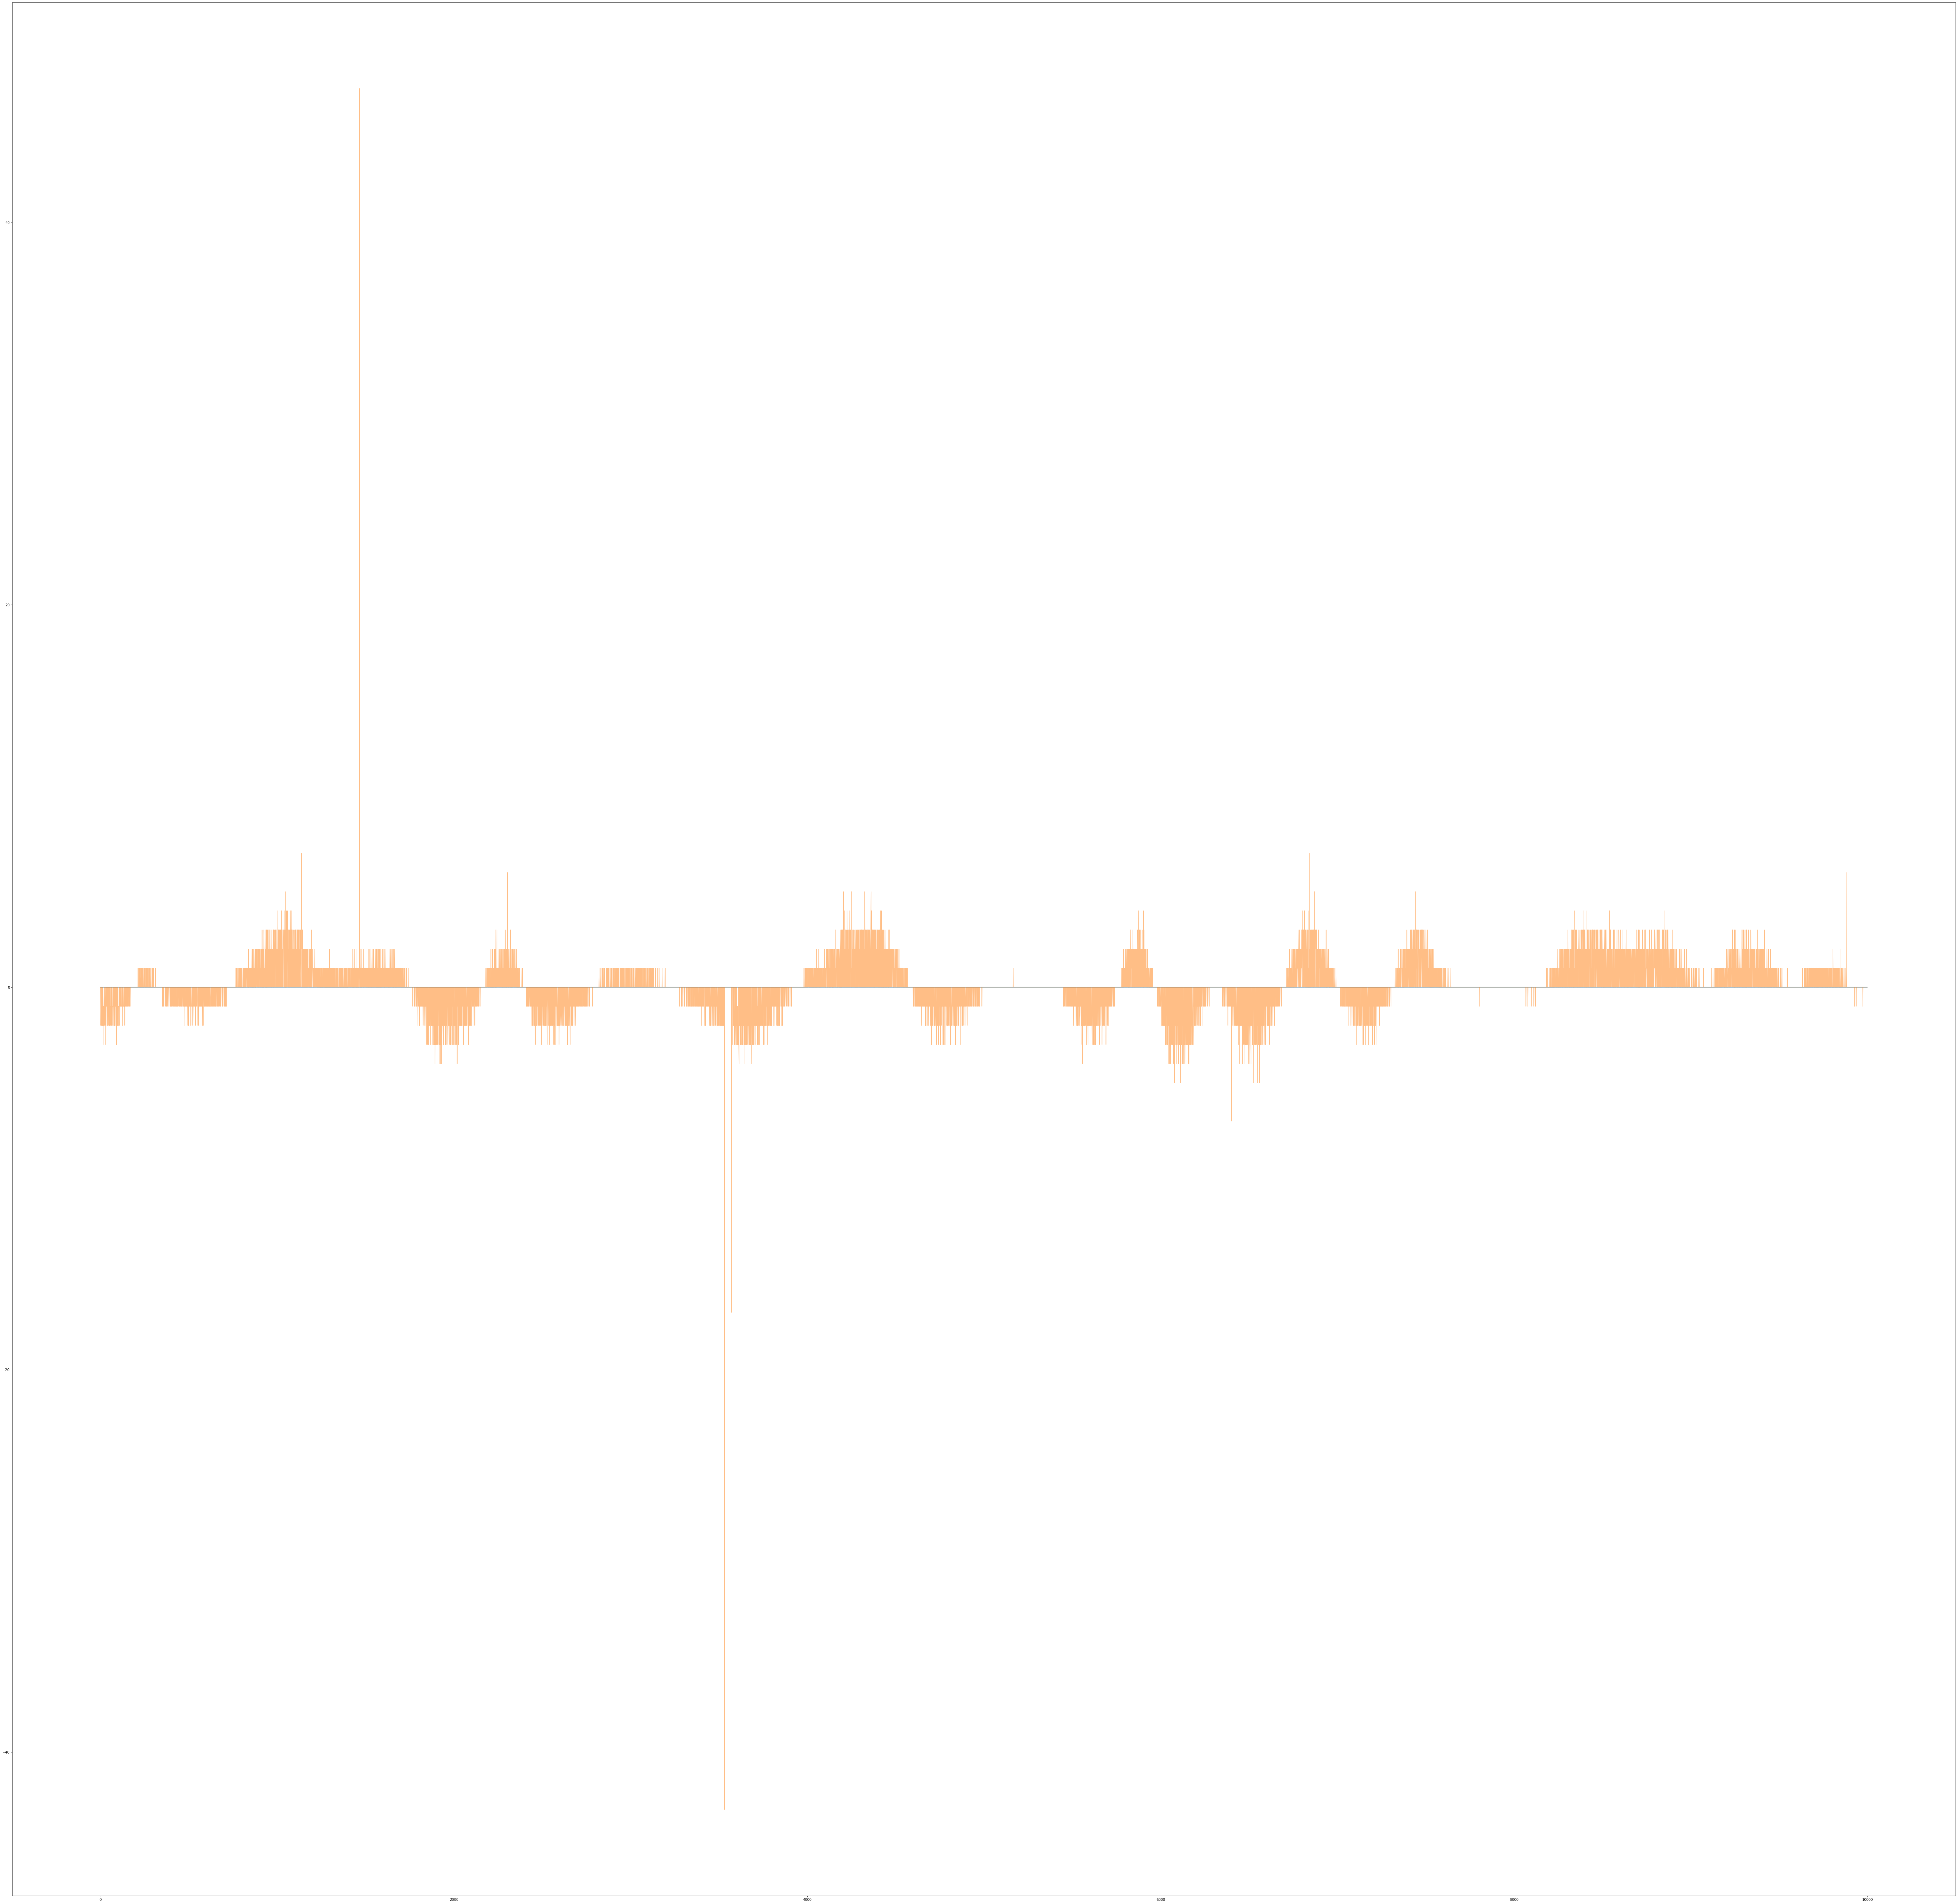

In [15]:
plt.figure(figsize=(100,100))

plt.plot(model.predict(X)[:,1][:10000])
plt.plot(y[:,1][:10000],alpha=.5)